In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
!python3 -m spacy download pt_core_news_lg
from tensorflow.keras import optimizers
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from scipy.sparse import csr_matrix
from nltk.corpus import stopwords
from transformers import pipeline
import matplotlib.pyplot as plt
from random import choice
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import torch
import string
import nltk
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
classifier = pipeline("zero-shot-classification")
candidate_labels = ["testador", "suporte", "ferramenta"]

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [3]:
roberta = pipeline("ner", grouped_entities=True, model="joelniklaus/legal-portuguese-roberta-base")

config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at joelniklaus/legal-portuguese-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/403 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [4]:
historias_usuario = [
    "Como Testador eu quero um jeito mais fácil de incluir os requisitos do aplicativo na ferramenta DRL-Mobtest para criar casos de teste que cubram tudo que o aplicativo precisa fazer, sem ter que gastar muito tempo escrevendo manualmente.",
    "Como Testador eu quero uma maneira de ensinar a ferramenta DRL-Mobtest a entender os requisitos do aplicativo usando NLP para fazer com que a ferramenta gere testes automaticamente.",
    "Como Testador eu quero que a ferramenta gere casos de teste abrangentes que cubram integralmente todos os requisitos do aplicativo, assegurando que o software seja completo e funcional, sem depender exclusivamente da criação manual de casos de teste.",
    "Como Testador eu quero que a ferramenta seja integrada com outras ferramentas de gerenciamento, permitindo sincronização automática dos requisitos e facilitando o processo de criação de casos de testes.",
    "Como testador, eu quero que a ferramenta gere casos de teste completos e funcionais que cubram todos os requisitos do aplicativo, para garantir uma cobertura abrangente durante os testes.",
    "Como testador, eu quero integração com outras ferramentas de gerenciamento para sincronizar automaticamente requisitos e facilitar a criação de casos de teste, visando melhorar a eficiência e precisão do processo de teste.",
    "Como testador, eu quero relatórios detalhados sobre a cobertura dos testes para análise precisa durante a execução, a fim de avaliar a qualidade e a extensão dos testes realizados.",
    "Como testador, eu desejo que a ferramenta identifique automaticamente os casos de teste mais críticos para priorizar a análise, visando direcionar os esforços de teste para áreas de maior risco.",
    "Como testador, eu preciso que a ferramenta sugira casos de teste com base em padrões de uso real do aplicativo, para garantir que os testes reflitam cenários típicos de uso.",
    "Como testador, eu quero sugestões com base em padrões de falha históricos para evitar problemas recorrentes no software, visando melhorar a qualidade e a robustez do produto.",
    "Como testador, eu desejo suporte à execução de testes automatizados em diferentes dispositivos e ambientes, para garantir a consistência e a confiabilidade dos testes em diferentes cenários.",
    "Como testador, eu preciso que a ferramenta detecte automaticamente mudanças nos requisitos e ajuste os casos de teste correspondentes, para manter os testes alinhados com a evolução do aplicativo.",
    "Como testador, eu quero integração com sistemas de controle de versão para rastrear mudanças nos requisitos e no código-fonte, visando uma gestão eficaz de mudanças durante o ciclo de desenvolvimento.",
    "Como testador, eu desejo métricas detalhadas sobre a eficácia dos testes, incluindo taxa de cobertura e taxa de falha, para avaliar a qualidade do processo de teste.",
    "Como testador, eu preciso de suporte à execução de testes de desempenho e escalabilidade, para garantir que o aplicativo atenda aos requisitos de desempenho sob carga.",
    "Como testador, eu quero análise automática dos resultados dos testes para relatórios detalhados sobre problemas encontrados, a fim de facilitar a identificação e correção de defeitos.",
    "Como testador, eu desejo simular cenários de teste complexos e realistas para garantir testes próximos à realidade, visando uma validação mais precisa do software.",
    "Como testador, eu preciso de suporte à execução de testes de regressão automatizados, para garantir que as alterações no código não introduzam regressões.",
    "Como testador, eu quero identificação automática de casos de teste redundantes ou desnecessários, para otimizar os esforços de teste.",
    "Como testador, eu desejo integração fácil com ferramentas de gerenciamento de projetos, para uma colaboração eficiente com outros membros da equipe de desenvolvimento.",
    "Como testador, eu preciso de suporte à execução de testes de usabilidade, para garantir que o aplicativo seja fácil e intuitivo de usar.",
    "Como testador, eu quero que a ferramenta crie automaticamente conjuntos de dados de teste realistas, para simular condições reais de uso.",
    "Como testador, eu desejo integração com ferramentas de monitoramento de desempenho em tempo real, para avaliar o desempenho do aplicativo durante os testes.",
    "Como testador, eu preciso de suporte à execução de testes de localização e internacionalização, para garantir que o aplicativo seja compatível com diferentes idiomas e regiões.",
    "Como testador, eu quero geração automática de dados de teste sintéticos, para complementar os casos de teste manuais.",
    "Como testador, eu desejo suporte à execução de testes de acessibilidade, para garantir que o aplicativo seja acessível a todos os usuários.",
    "Como testador, eu preciso de suporte à execução de testes de integração contínua, para garantir que as alterações no código não quebrem a integração com outras partes do sistema.",
    "Como testador, eu quero identificação automática de casos de teste incompletos ou mal definidos, para garantir a qualidade dos testes.",
    "Como testador, eu desejo identificação automática de dependências entre casos de teste, para garantir uma sequência lógica na execução dos testes.",
    "Como testador, eu preciso de suporte à execução de testes de recuperação de desastres, para avaliar a capacidade do sistema de se recuperar de falhas.",
    "Como testador, eu quero que a ferramenta identifique automaticamente casos de teste paralelizáveis, para otimizar a execução dos testes.",
    "Como testador, eu desejo simulação de cenários de teste de carga extremamente alta, para avaliar a capacidade de escalabilidade do sistema.",
    "Como testador, eu preciso de suporte à execução de testes de compatibilidade com diferentes navegadores e dispositivos, para garantir uma experiência consistente para todos os usuários.",
    "Como testador, eu quero geração automática de relatórios de teste personalizados, para comunicar eficazmente os resultados dos testes.",
    "Como testador, eu desejo rastreamento automático de resultados de teste ao longo do tempo, para identificar tendências e padrões de qualidade.",
    "Como testador, eu preciso de suporte à execução de testes de regressão progressiva, para garantir que as novas alterações não quebrem funcionalidades existentes.",
    "Como testador, eu quero sugestões automáticas para aprimorar os casos de teste existentes, para aumentar a eficiência e a eficácia dos testes.",
    "Como testador, eu desejo que a ferramenta aprenda com os resultados dos testes e melhore suas sugestões futuras, para uma otimização contínua do processo de teste.",
    "Como testador, eu preciso de suporte à execução de testes de segurança automatizados, para identificar vulnerabilidades no aplicativo.",
    "Como testador, eu quero integração com ferramentas de análise de código estático para identificar áreas de risco, para uma avaliação abrangente da qualidade do código.",
    "Como testador, eu desejo suporte à execução de testes de integração de sistema e teste de aceitação do usuário, para validar a integração entre diferentes partes do sistema e a conformidade com os requisitos do usuário.",
    "Como testador, eu preciso de suporte à execução de testes de confiabilidade e disponibilidade, para garantir que o aplicativo esteja sempre disponível e funcione corretamente.",
    "Como testador, eu quero que a ferramenta sugira casos de teste com base em modelos de qualidade de software reconhecidos, para garantir uma abordagem abrangente e padronizada para os testes.",
    "Como testador, eu desejo integração com ferramentas de automação de teste de interface do usuário, para automatizar testes de interação com o usuário.",
    "Como testador, eu preciso de suporte à execução de testes de estresse e robustez, para avaliar a estabilidade e a confiabilidade do aplicativo sob condições adversas.",
    "Como testador, eu quero que a ferramenta sugira casos de teste para áreas de alto risco e complexidade, para priorizar os esforços de teste.",
    "Como testador, eu desejo integração com ferramentas de gerenciamento de defeitos para rastreamento de correções, para uma gestão eficaz de problemas encontrados durante os testes.",
    "Como testador, eu preciso de suporte à execução de testes de usabilidade remota e teste de usuário beta, para coletar feedback de usuários reais.",
    "Como testador, eu quero que a ferramenta forneça feedback em tempo real durante a execução dos testes, para facilitar a identificação imediata de problemas.",
    "Como testador, eu desejo integração com ferramentas de automação de infraestrutura para provisionamento e configuração automatizados, para facilitar a preparação do ambiente de teste.",
    "Como testador, eu preciso de suporte à execução de testes de comparação de desempenho para versões anteriores e atuais do aplicativo, para avaliar o impacto de mudanças no desempenho."
]


In [5]:
#sem_pontuacao = re.findall(r'\b(^[^A-Za-z])\b', historias_usuario, re.IGNORECASE)

In [6]:
class ProcessadorHistoriasUsuario:
    def __init__(self):
        nltk.download('punkt')
        nltk.download('stopwords')
        nltk.download('wordnet')
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('portuguese'))

    def processar_historias_usuario(self, historias_usuario):
        freq_dists = []
        for historia_usuario in historias_usuario:
            tokens = word_tokenize(historia_usuario)
            tokens = [token.lower() for token in tokens if token not in string.punctuation]
            tokens = [token for token in tokens if token not in self.stop_words]
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens]
            freq_dist = FreqDist(tokens)
            freq_dists.append(freq_dist)
        return freq_dists

In [7]:
processador = ProcessadorHistoriasUsuario()
freq_dists = processador.processar_historias_usuario(historias_usuario)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
unicas = set()

# Iterando sobre as distribuições de frequência para obter as palavras únicas
for freq_dist in freq_dists:
    unicas.update(freq_dist.keys())

print("Total de palavras únicas:", len(unicas))
print("Diversidade Lexica:", len(unicas) / len(freq_dists))

Total de palavras únicas: 262
Diversidade Lexica: 5.137254901960785


In [9]:
for i, freq_dist in enumerate(freq_dists):
    print(f"História de Usuário {i+1}: {freq_dist.most_common(5)}")

História de Usuário 1: [('aplicativo', 2), ('testador', 1), ('quero', 1), ('jeito', 1), ('fácil', 1)]
História de Usuário 2: [('ferramenta', 2), ('testador', 1), ('quero', 1), ('maneira', 1), ('ensinar', 1)]
História de Usuário 3: [('casos', 2), ('teste', 2), ('testador', 1), ('quero', 1), ('ferramenta', 1)]
História de Usuário 4: [('testador', 1), ('quero', 1), ('ferramenta', 1), ('integrada', 1), ('outras', 1)]
História de Usuário 5: [('testador', 1), ('quero', 1), ('ferramenta', 1), ('gere', 1), ('casos', 1)]
História de Usuário 6: [('teste', 2), ('testador', 1), ('quero', 1), ('integração', 1), ('outras', 1)]
História de Usuário 7: [('testis', 2), ('testador', 1), ('quero', 1), ('relatórios', 1), ('detalhados', 1)]
História de Usuário 8: [('teste', 2), ('testador', 1), ('desejo', 1), ('ferramenta', 1), ('identifique', 1)]
História de Usuário 9: [('uso', 2), ('testador', 1), ('preciso', 1), ('ferramenta', 1), ('sugira', 1)]
História de Usuário 10: [('testador', 1), ('quero', 1), ('s

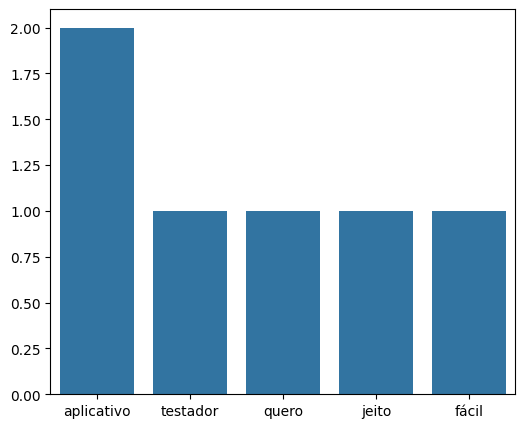

In [10]:
nome, valor = zip(*freq_dists[0].most_common(5))
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=np.array(nome), y=np.array(valor), ax=ax)
plt.show()

<Axes: >

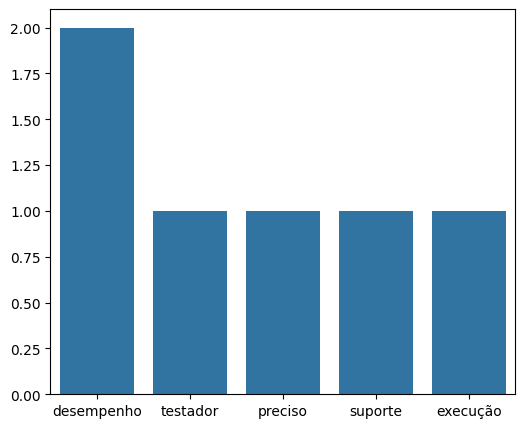

In [11]:
nome,valor = zip(*freq_dist.most_common(5))
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=np.array(nome), y=np.array(valor), ax=ax)

In [12]:
for i, freq_dist in enumerate(freq_dists):
    historia_usuario = " ".join(freq_dist.keys())
    result = classifier(historia_usuario, candidate_labels=candidate_labels)
    top_label = result['labels'][0]
    confidence = result['scores'][0]
    print(f"História de Usuário {i+1}: Rótulo Previsto: {top_label}, Confiança: {confidence:.2f}")

História de Usuário 1: Rótulo Previsto: testador, Confiança: 0.51
História de Usuário 2: Rótulo Previsto: testador, Confiança: 0.68
História de Usuário 3: Rótulo Previsto: testador, Confiança: 0.58
História de Usuário 4: Rótulo Previsto: testador, Confiança: 0.62
História de Usuário 5: Rótulo Previsto: testador, Confiança: 0.62
História de Usuário 6: Rótulo Previsto: testador, Confiança: 0.80
História de Usuário 7: Rótulo Previsto: testador, Confiança: 0.78
História de Usuário 8: Rótulo Previsto: testador, Confiança: 0.57
História de Usuário 9: Rótulo Previsto: testador, Confiança: 0.59
História de Usuário 10: Rótulo Previsto: testador, Confiança: 0.80
História de Usuário 11: Rótulo Previsto: testador, Confiança: 0.66
História de Usuário 12: Rótulo Previsto: testador, Confiança: 0.76
História de Usuário 13: Rótulo Previsto: testador, Confiança: 0.94
História de Usuário 14: Rótulo Previsto: testador, Confiança: 0.86
História de Usuário 15: Rótulo Previsto: testador, Confiança: 0.74
Hist

In [13]:
roberta(f"Resultado: {freq_dists}")

[{'entity_group': 'LABEL_0',
  'score': 0.7572898,
  'word': " resultado : [ freqdist ( { ' aplicativo ' : 2 , ' testador ' : 1 , ' quero ' : 1 , ' jeito ' : 1 , ' facil ' : 1 , ' incluir ' : 1 , ' requisitos ' : 1 , ' ferramenta ' : 1 , ' drl - mobtest ' : 1 , ' criar ' : 1 , . . . } ) , freqdist ( { ' ferramenta ' : 2 , ' testador ' : 1 , ' quero ' : 1 , ' maneira ' : 1 , ' ensinar ' : 1 , ' drl - mobtest ' : 1 , ' entender ' : 1 , ' requisitos ' : 1 , ' aplicativo ' : 1 , ' usando ' : 1 , . . . } ) , freqdist ( { ' casos ' : 2 , ' teste ' : 2 , ' testador ' : 1 , '",
  'start': 0,
  'end': 394},
 {'entity_group': 'LABEL_1',
  'score': 0.5245032,
  'word': ' que',
  'start': 395,
  'end': 397},
 {'entity_group': 'LABEL_0',
  'score': 0.74498034,
  'word': "ro ' : 1 , '",
  'start': 397,
  'end': 406},
 {'entity_group': 'LABEL_1',
  'score': 0.5767684,
  'word': ' ferramenta',
  'start': 407,
  'end': 416},
 {'entity_group': 'LABEL_0',
  'score': 0.74579805,
  'word': " ' : 1 , ' gere

In [14]:
for i, freq_dist in enumerate(freq_dists):
    historia_usuario = " ".join(freq_dist.keys())
    result = roberta(f"História de Usuário {i+1}: {historia_usuario}")
    print(f"Resultado para História de Usuário {i+1}: {result}")

Resultado para História de Usuário 1: [{'entity_group': 'LABEL_0', 'score': 0.7589681, 'word': ' historia de usuario 1 : testador quero jeito facil incluir requisitos aplicativo ferramenta drl - mobtest criar casos teste cubram tudo precisa fazer ter gastar tempo escrevendo manualmente', 'start': 0, 'end': 186}]
Resultado para História de Usuário 2: [{'entity_group': 'LABEL_0', 'score': 0.78634924, 'word': ' historia de usuario 2 : testador quero maneira ensinar ferramenta drl - mobtest entender requisitos aplicativo usando nlp fazer gere testis automaticamente', 'start': 0, 'end': 152}]
Resultado para História de Usuário 3: [{'entity_group': 'LABEL_1', 'score': 0.5876135, 'word': ' historia', 'start': 0, 'end': 8}, {'entity_group': 'LABEL_0', 'score': 0.75332326, 'word': ' de', 'start': 10, 'end': 11}, {'entity_group': 'LABEL_1', 'score': 0.52675337, 'word': ' usuario', 'start': 13, 'end': 19}, {'entity_group': 'LABEL_0', 'score': 0.68931425, 'word': ' 3 : testador quero ferramenta ge

In [15]:
def extract_info(freq_dist):
    freq_dist_text = " ".join(freq_dist.keys())

    autor = None
    if "testador" in freq_dist_text.lower():
        autor = "Testador"

    finalidade = None
    for word in ["quero", "preciso", "desejo"]:
        if word in freq_dist_text.lower():
            pos_inicial = freq_dist_text.lower().find(word) + len(word)
            finalidade = freq_dist_text[pos_inicial:].strip().split(",")[0]
            break

    if "para" in freq_dist_text.lower():
        pos_inicial = freq_dist_text.lower().find("para") + len("para")
        objetivo = freq_dist_text[pos_inicial:].strip()

    return autor, finalidade


for i, freq_dist in enumerate(freq_dists):
    autor, finalidade = extract_info(freq_dist)
    print("História do Usuário:", historias_usuario[i])
    print("Autor:", autor)
    print("Finalidade:", finalidade)
    print()


História do Usuário: Como Testador eu quero um jeito mais fácil de incluir os requisitos do aplicativo na ferramenta DRL-Mobtest para criar casos de teste que cubram tudo que o aplicativo precisa fazer, sem ter que gastar muito tempo escrevendo manualmente.
Autor: Testador
Finalidade: jeito fácil incluir requisitos aplicativo ferramenta drl-mobtest criar casos teste cubram tudo precisa fazer ter gastar tempo escrevendo manualmente

História do Usuário: Como Testador eu quero uma maneira de ensinar a ferramenta DRL-Mobtest a entender os requisitos do aplicativo usando NLP para fazer com que a ferramenta gere testes automaticamente.
Autor: Testador
Finalidade: maneira ensinar ferramenta drl-mobtest entender requisitos aplicativo usando nlp fazer gere testis automaticamente

História do Usuário: Como Testador eu quero que a ferramenta gere casos de teste abrangentes que cubram integralmente todos os requisitos do aplicativo, assegurando que o software seja completo e funcional, sem depend

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
!pip install scikit-learn

In [17]:
X = freq_dists
rotulos_possiveis = ["testador", "aplicativo", "desempenho", "suporte"]
y = [choice(rotulos_possiveis) for _ in range(len(freq_dists))]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([" ".join(freq_dist.keys()) for freq_dist in X])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42,stratify=y)

In [19]:
from sklearn.linear_model import LogisticRegression
modelo_regressao = LogisticRegression()
modelo_regressao.fit(X_train, y_train)
y_predicted = modelo_regressao.predict(X_test)
acuracia = accuracy_score(y_test, y_predicted)
print("Acurácia:", acuracia)

Acurácia: 0.38095238095238093


In [20]:
clf_tf = DecisionTreeClassifier(criterion='gini',max_depth=15)
clf_tf.fit(X_train, y_train)
pred_arvore_entropy_tf = clf_tf.predict(X_test)
accuracy_decision = accuracy_score(y_test,pred_arvore_entropy_tf)
recall = recall_score(y_test, pred_arvore_entropy_tf, average='weighted')
f1 = f1_score(y_test, pred_arvore_entropy_tf, average='weighted')
print(pred_arvore_entropy_tf)
print(accuracy_decision)
print(recall)
print(f1)

['aplicativo' 'suporte' 'aplicativo' 'suporte' 'suporte' 'suporte'
 'suporte' 'suporte' 'testador' 'desempenho' 'desempenho' 'suporte'
 'desempenho' 'desempenho' 'desempenho' 'testador' 'desempenho' 'suporte'
 'desempenho' 'desempenho' 'suporte']
0.38095238095238093
0.38095238095238093
0.3726190476190476


In [21]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=7)
clf.fit(X_train, y_train)
pred_arvore_entropy = clf.predict(X_test)
accuracy_decision = accuracy_score(y_test,pred_arvore_entropy)
recall_entropy = recall_score(y_test, pred_arvore_entropy, average='weighted')
f1_entropy = f1_score(y_test, pred_arvore_entropy, average='weighted')
print(pred_arvore_entropy_tf)
print(accuracy_decision)
print(recall_entropy)
print(f1_entropy)

['aplicativo' 'suporte' 'aplicativo' 'suporte' 'suporte' 'suporte'
 'suporte' 'suporte' 'testador' 'desempenho' 'desempenho' 'suporte'
 'desempenho' 'desempenho' 'desempenho' 'testador' 'desempenho' 'suporte'
 'desempenho' 'desempenho' 'suporte']
0.42857142857142855
0.42857142857142855
0.39075630252100846


In [22]:
clf_tf3 = KNeighborsClassifier(metric='manhattan',n_neighbors=3)
clf_tf3.fit(X_train, y_train)
pred_knn_tf = clf_tf3.predict(X_test)
acuracy_KNN = accuracy_score(y_test,pred_knn_tf)
recall_knn = recall_score(y_test, pred_knn_tf, average='weighted')
f1_knn = f1_score(y_test, pred_knn_tf, average='weighted')
print(pred_knn_tf)
print(acuracy_KNN)
print(recall_knn)
print(f1_knn)

['desempenho' 'desempenho' 'desempenho' 'desempenho' 'desempenho'
 'desempenho' 'desempenho' 'suporte' 'desempenho' 'desempenho'
 'desempenho' 'desempenho' 'desempenho' 'aplicativo' 'desempenho'
 'aplicativo' 'desempenho' 'desempenho' 'desempenho' 'desempenho'
 'desempenho']
0.3333333333333333
0.3333333333333333
0.20512820512820515


In [23]:
clf_tf4 = KNeighborsClassifier(n_neighbors=5,weights='distance', algorithm='brute')
clf_tf4.fit(X_train, y_train)
pred_knn_tf2 = clf_tf4.predict(X_test)
acuracy_KNN2 = accuracy_score(y_test,pred_knn_tf2)
recall_knn2 = recall_score(y_test, pred_knn_tf2, average='weighted')
f1_knn2 = f1_score(y_test, pred_knn_tf2, average='weighted')
print(pred_knn_tf)
print(acuracy_KNN)
print(recall_knn2)
print(f1_knn2)

['desempenho' 'desempenho' 'desempenho' 'desempenho' 'desempenho'
 'desempenho' 'desempenho' 'suporte' 'desempenho' 'desempenho'
 'desempenho' 'desempenho' 'desempenho' 'aplicativo' 'desempenho'
 'aplicativo' 'desempenho' 'desempenho' 'desempenho' 'desempenho'
 'desempenho']
0.3333333333333333
0.2857142857142857
0.2253968253968254


In [24]:
svc = SVC(kernel='linear', C=0.05)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, pred_svc)
recall_svc = recall_score(y_test, pred_svc, average='weighted')
f1_svc = f1_score(y_test, pred_svc, average='weighted')
print(pred_svc)
print(accuracy_svc)
print(recall_svc)
print(f1_svc)


['desempenho' 'desempenho' 'desempenho' 'desempenho' 'desempenho'
 'desempenho' 'desempenho' 'desempenho' 'desempenho' 'desempenho'
 'desempenho' 'desempenho' 'desempenho' 'desempenho' 'desempenho'
 'desempenho' 'desempenho' 'desempenho' 'desempenho' 'desempenho'
 'desempenho']
0.38095238095238093
0.38095238095238093
0.21018062397372742


In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import layers
import os
import shutil

In [26]:
le_rn = LabelEncoder()
ytrain = le_rn.fit_transform(y_train)
ytest = le_rn.transform(y_test)

In [27]:
Xtrain = np.expand_dims(X_train.toarray(), axis=1)
Xtest = np.expand_dims(X_test.toarray(), axis=1)

In [28]:
num_classes = 4
model = tf.keras.Sequential([
    layers.LSTM(128, input_shape=(Xtrain.shape[1], Xtrain.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
EPOCHS = 20
history = model.fit(Xtrain, ytrain, epochs=EPOCHS, batch_size=32, validation_data=(Xtest, ytest))


Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 1.3881 - accuracy: 0.2667 - val_loss: 1.3873 - val_accuracy: 0.2857
Epoch 2/20
1/1 [==============================] - 0s 80ms/step - loss: 1.3795 - accuracy: 0.5333 - val_loss: 1.3854 - val_accuracy: 0.2381
Epoch 3/20
1/1 [==============================] - 0s 77ms/step - loss: 1.3719 - accuracy: 0.8333 - val_loss: 1.3838 - val_accuracy: 0.2381
Epoch 4/20
1/1 [==============================] - 0s 44ms/step - loss: 1.3644 - accuracy: 0.8667 - val_loss: 1.3822 - val_accuracy: 0.3333
Epoch 5/20
1/1 [==============================] - 0s 41ms/step - loss: 1.3571 - accuracy: 0.9000 - val_loss: 1.3807 - val_accuracy: 0.3333
Epoch 6/20
1/1 [==============================] - 0s 39ms/step - loss: 1.3498 - accuracy: 0.9333 - val_loss: 1.3793 - val_accuracy: 0.3333
Epoch 7/20
1/1 [==============================] - 0s 50ms/step - loss: 1.3422 - accuracy: 0.9333 - val_loss: 1.3780 - val_accuracy: 0.3333
Epoch 8/20
1/1 [=============

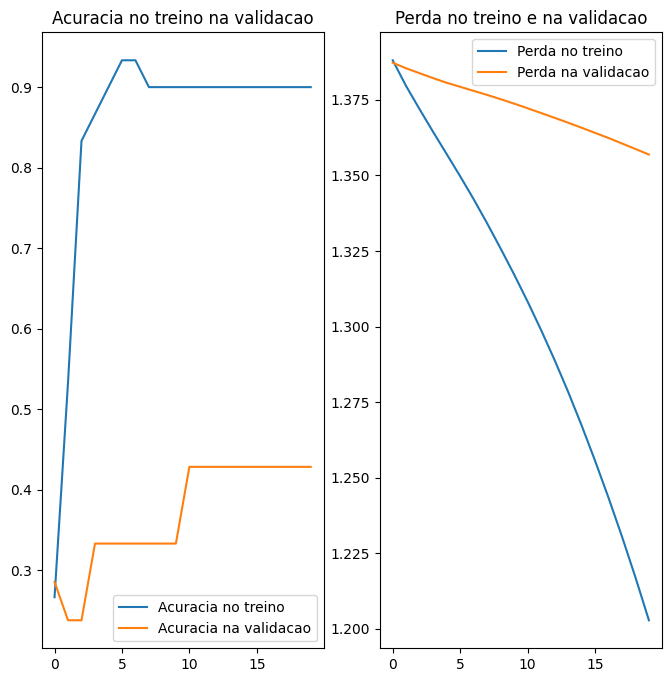

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acuracia no treino')
plt.plot(epochs_range, val_acc, label='Acuracia na validacao')
plt.legend(loc='lower right')
plt.title('Acuracia no treino na validacao')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda no treino')
plt.plot(epochs_range, val_loss, label='Perda na validacao')
plt.legend(loc='upper right')
plt.title('Perda no treino e na validacao')
plt.show()


In [32]:
model_drop = tf.keras.Sequential([
    layers.LSTM(128, input_shape=(Xtrain.shape[1], Xtrain.shape[2])),
    layers.Dense(64, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [33]:
model_drop.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [34]:
EPOCHS = 20
history_drop = model_drop.fit(Xtrain, ytrain, epochs=EPOCHS, batch_size=32, validation_data=(Xtest, ytest))

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 1.3846 - accuracy: 0.3333 - val_loss: 1.3871 - val_accuracy: 0.2381
Epoch 2/20
1/1 [==============================] - 0s 62ms/step - loss: 1.3750 - accuracy: 0.5000 - val_loss: 1.3854 - val_accuracy: 0.2381
Epoch 3/20
1/1 [==============================] - 0s 72ms/step - loss: 1.3707 - accuracy: 0.5667 - val_loss: 1.3837 - val_accuracy: 0.2381
Epoch 4/20
1/1 [==============================] - 0s 127ms/step - loss: 1.3656 - accuracy: 0.6000 - val_loss: 1.3822 - val_accuracy: 0.2381
Epoch 5/20
1/1 [==============================] - 0s 105ms/step - loss: 1.3610 - accuracy: 0.7000 - val_loss: 1.3807 - val_accuracy: 0.2381
Epoch 6/20
1/1 [==============================] - 0s 73ms/step - loss: 1.3585 - accuracy: 0.7000 - val_loss: 1.3792 - val_accuracy: 0.2381
Epoch 7/20
1/1 [==============================] - 0s 100ms/step - loss: 1.3488 - accuracy: 0.7000 - val_loss: 1.3776 - val_accuracy: 0.2381
Epoch 8/20
1/1 [==========

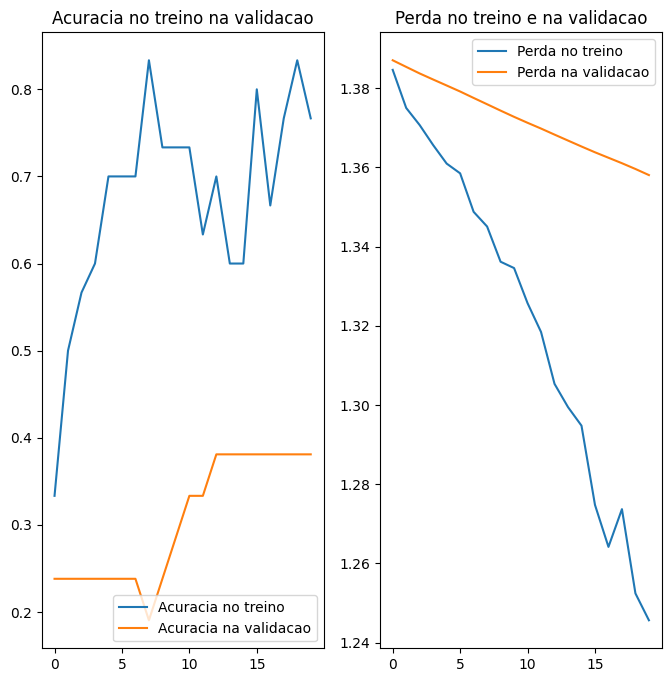

In [35]:
acc2 = history_drop.history['accuracy']
val_acc2 = history_drop.history['val_accuracy']
loss2 = history_drop.history['loss']
val_loss2 = history_drop.history['val_loss']

epochs_range = range(len(acc2))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label='Acuracia no treino')
plt.plot(epochs_range, val_acc2, label='Acuracia na validacao')
plt.legend(loc='lower right')
plt.title('Acuracia no treino na validacao')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, label='Perda no treino')
plt.plot(epochs_range, val_loss2, label='Perda na validacao')
plt.legend(loc='upper right')
plt.title('Perda no treino e na validacao')
plt.show()


In [36]:
model_early = tf.keras.Sequential([
    layers.LSTM(128, input_shape=(Xtrain.shape[1], Xtrain.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [37]:
model_early.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [38]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=1e-2,
        patience=5,
        restore_best_weights=True,
        verbose=1,
    )
]

In [39]:
EPOCHS = 100
history_early = model_early.fit(Xtrain, ytrain,callbacks = callbacks, epochs=EPOCHS, batch_size=32, validation_data=(Xtest, ytest))

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 1.3884 - accuracy: 0.2333 - val_loss: 1.3843 - val_accuracy: 0.1429
Epoch 2/100
1/1 [==============================] - 0s 78ms/step - loss: 1.3795 - accuracy: 0.4333 - val_loss: 1.3826 - val_accuracy: 0.1429
Epoch 3/100
1/1 [==============================] - 0s 73ms/step - loss: 1.3713 - accuracy: 0.5000 - val_loss: 1.3807 - val_accuracy: 0.1429
Epoch 4/100
1/1 [==============================] - 0s 96ms/step - loss: 1.3634 - accuracy: 0.5667 - val_loss: 1.3788 - val_accuracy: 0.1429
Epoch 5/100
1/1 [==============================] - 0s 73ms/step - loss: 1.3557 - accuracy: 0.7000 - val_loss: 1.3770 - val_accuracy: 0.1905
Epoch 6/100
1/1 [==============================] - 0s 107ms/step - loss: 1.3480 - accuracy: 0.7333 - val_loss: 1.3753 - val_accuracy: 0.1905
Epoch 6: early stopping


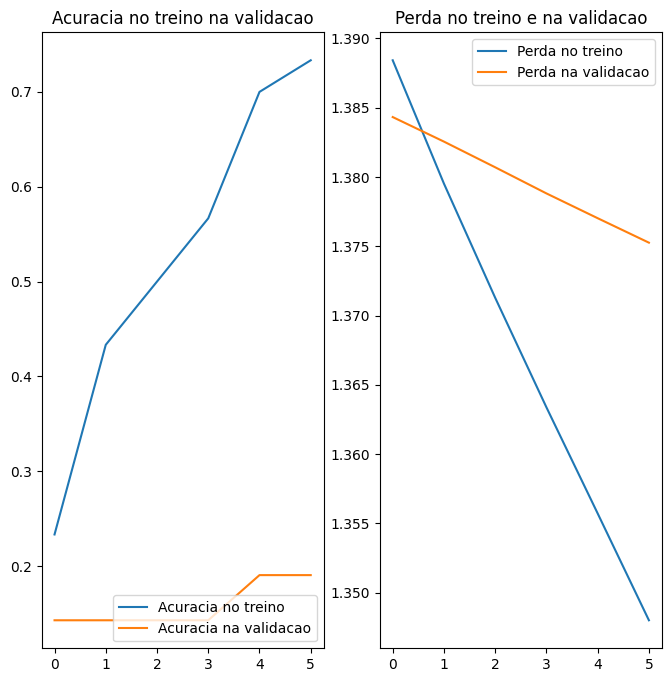

In [40]:
acc3 = history_early.history['accuracy']
val_acc3 = history_early.history['val_accuracy']
loss3 = history_early.history['loss']
val_loss3 = history_early.history['val_loss']

epochs_range = range(len(acc3))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc3, label='Acuracia no treino')
plt.plot(epochs_range, val_acc3, label='Acuracia na validacao')
plt.legend(loc='lower right')
plt.title('Acuracia no treino na validacao')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss3, label='Perda no treino')
plt.plot(epochs_range, val_loss3, label='Perda na validacao')
plt.legend(loc='upper right')
plt.title('Perda no treino e na validacao')
plt.show()

In [41]:
model_few = tf.keras.Sequential([
    layers.LSTM(128, input_shape=(Xtrain.shape[1], Xtrain.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model_few.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
EPOCHS = 20
history_few = model_few.fit(Xtrain, ytrain, epochs=EPOCHS, batch_size=32, validation_data=(Xtest, ytest))

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 1.3882 - accuracy: 0.3000 - val_loss: 1.3829 - val_accuracy: 0.3810
Epoch 2/20
1/1 [==============================] - 0s 114ms/step - loss: 1.3794 - accuracy: 0.4333 - val_loss: 1.3810 - val_accuracy: 0.5714
Epoch 3/20
1/1 [==============================] - 0s 80ms/step - loss: 1.3712 - accuracy: 0.7667 - val_loss: 1.3793 - val_accuracy: 0.4762
Epoch 4/20
1/1 [==============================] - 0s 65ms/step - loss: 1.3634 - accuracy: 0.8000 - val_loss: 1.3774 - val_accuracy: 0.4762
Epoch 5/20
1/1 [==============================] - 0s 108ms/step - loss: 1.3556 - accuracy: 0.8667 - val_loss: 1.3756 - val_accuracy: 0.4762
Epoch 6/20
1/1 [==============================] - 0s 77ms/step - loss: 1.3478 - accuracy: 0.8667 - val_loss: 1.3738 - val_accuracy: 0.4286
Epoch 7/20
1/1 [==============================] - 0s 102ms/step - loss: 1.3398 - accuracy: 0.8667 - val_loss: 1.3719 - val_accuracy: 0.4286
Epoch 8/20
1/1 [==========

In [42]:
X = freq_dists
rotulos_possiveis = ["testador", "aplicativo", "execução", "suporte"]
y = [choice(rotulos_possiveis) for _ in range(len(freq_dists))]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([" ".join(freq_dist.keys()) for freq_dist in X])


X_novos = csr_matrix(X)
X_novos.sort_indices()


X_novos = np.expand_dims(X_novos.toarray(), axis=1)

y_novos = le_rn.transform([choice(rotulos_possiveis) for _ in range(len(y))])

EPOCHS = 20
history_few = model_few.fit(X_novos, y_novos, epochs=EPOCHS, batch_size=32, validation_split=0.2)


ValueError: y contains previously unseen labels: 'execução'